By Kwesi Manu Eghan
<p>Submitted for PHY469 End of Semester Assignment</p>

###
<h2 style="color:#de2e0b; font-weight: 650; font-size:60px"> Background</h2>



<h4 style="color: #7393B3; font-weight: 750;">What is Computational Physics?</h4>
<p>Computational physics emerged in the 1950s as computers became more powerful, allowing physicists to solve complex problems using numerical methods. It has since become an essential tool in many areas of physics research, allowing researchers to perform numerical experiments that are too complex or too expensive to perform in a laboratory.  In such cases, numerical methods and algorithms are used to simulate and solve these problems. This is where
computational physics comes in, as it involves the development and application of numerical methods to solve physical problems. </p>
<p>Scientific programming languages such as <span style="color: dodgerblue; font-style: italic;">Python</span>, <span style="color: dodgerblue; font-style: italic;">R</span>, and <span style="color: dodgerblue; font-style: italic;">MATLAB</span> are commonly used in this field.</p>

|                 |                      |
|-----------------|----------------------|
| ![Python](images/python.svg) | Python is a popular, high-level programming language known for its simple syntax and a wide range of applications such as web development, scientific computing, AI and data analysis.|
| ![R Programming](images/Rprog.svg) | R is a programming language for statistical computing and data analysis, widely used for its powerful data manipulation and visualization capabilities. It provides a variety of statistical and graphical techniques and is highly extensible.|
| ![MATLAB](images/matlab.svg) | MATLAB is a programming environment and language for numerical computation, data analysis, and visualization. It has a wide range of tools for signal processing, image processing, optimization, and control systems and interfaces with other languages.|


</br>
<h4 style="color: #7393B3; font-weight: 750;">How Computational Physics relates to the task given</h4>
<p>This code relates to computational physics in the sense that it uses numerical methods and algorithms to solve quantum mechanical problems.
The code implements the finite difference method to solve the Schrödinger equation and obtain the energy eigenvalues and eigenfunctions of a
particle in a quantum well potential, making use of the <span style="color: dodgerblue; font-weigth: bold">finite diffrence method</span> to  discretize the wavefunction and the potential energy function. The code also visualizes the results through plots, which is an essential aspect of computational physics. </p>

</br>
<h4 style="color: #7393B3; font-weight: 750;">Objectives for this study</h4>
<ul>
<li>To model a quantum well and analyze its energy states and wavefunctions </li>
<li>To investigate the dependence of energy levels on well width and barrier height </li>
<li>To visualize wavefunctions of the ground state and first excited state, and their dependence on well parameters. </li>
</ul>

###
<h2 style="color:#de2e0b; font-weight: 650; font-size:60px"> Method</h2>

#### Code

In [4]:
import numpy as np
import matplotlib.pyplot as plt


class QuantumWell:
    # Class initializer with initial values for Parameters
    def __init__(self, N=1000, a=0.45, b=1, V0=100):
        """
        Initializes the QuantumWell class.
        

        Parameters:
            N (int): Number of grid points.
            a (float): Width of the well.
            b (float): Total width of the system.
            V0 (float): Height of the potential barrier.
            hbar (float): Reduced Planck constant 
            m (float): Mass of particle
        """

        self.hbar = 1.054571817e-34
        self.m = 9.1093837e-31
        self.N = N
        self.a = a
        self.b = b
        self.V0 = V0

        # Discretize the wavefunction and potential energy function
        self.x = np.linspace(0, self.b, self.N)
        self.dx = self.x[1] - self.x[0]
        self.V = np.piecewise(self.x, [self.x < self.a, (self.x >= self.a) & (self.x <= self.b), self.x > self.b], [0, self.V0, np.inf])
        self.H = -(self.hbar**2)/(2*self.m) * (np.diag(np.ones(self.N-1), -1) - 2*np.diag(np.ones(self.N), 0) + np.diag(np.ones(self.N-1), 1)) / self.dx**2 + np.diag(self.V)
        # Solve the eigenvalue problem using the finite difference method
        self.E, self.psi = np.linalg.eigh(self.H)

    
    #Method to plot diagrams after computations
    def plot_well(self):
        fig, ax = plt.subplots(2, 2, figsize=(15, 10)) #Create a 2x2 subplots with size 15x10

        # Plot wavefunctions of the ground state and first excited state
        ax[0, 0].plot(self.x, self.psi[:, 0], label='Ground state', color='r')
        ax[0, 0].plot(self.x, self.psi[:, 1], label='First excited state')
        ax[0, 0].set_xlabel('Position')
        ax[0, 0].set_ylabel('Wavefunction')
        ax[0, 0].set_title('Wavefunctions of Ground and First Excited States')
        ax[0, 0].legend()

        # Plot energy levels as a function of well width
        a_vals = np.linspace(0.1, self.b-0.1, 10)
        ax[0, 1].plot(a_vals, self.E[:10])
        ax[0, 1].set_xlabel('Well width')
        ax[0, 1].set_ylabel('Energy eigenvalue')
        ax[0, 1].set_title('Energy Levels as a Function of Well Width')

        # Plot energy levels as a function of barrier height
        V0_vals = np.linspace(0.1, self.V0, 10)
        ax[1, 0].plot(V0_vals, self.E[:10])
        ax[1, 0].set_xlabel('Barrier height')
        ax[1, 0].set_ylabel('Energy eigenvalue')
        ax[1, 0].set_title('Energy Levels as a Function of Barrier Height')

        # Plot wavefunctions of the ground state and first excited state in the well
        ax[1, 1].plot(self.x, self.psi[:, 0], label='Ground state', color='r')
        ax[1, 1].plot(self.x, self.psi[:, 1], label='First excited state')
        ax[1, 1].set_xlabel('Position')
        ax[1, 1].set_ylabel('Wavefunction')
        ax[1, 1].set_ylim([-0.2, 0.2])
        ax[1, 1].set_xlim([self.a-0.2, self.b+0.2])
        ax[1, 1].set_title('Wavefunctions of Ground and First Excited States in the Well')
        ax[1, 1].legend()

        plt.tight_layout


#### Implementation

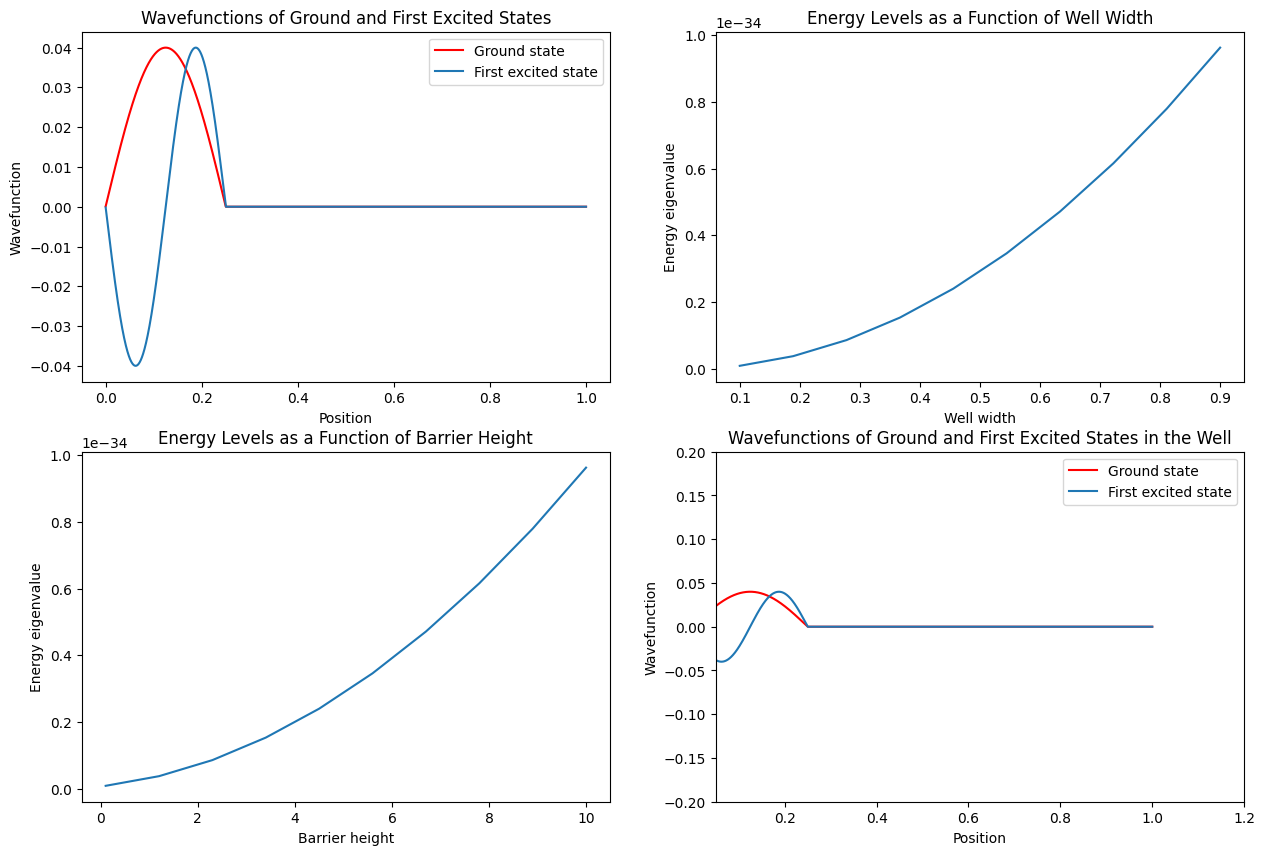

In [5]:
# Variables for well parameters
a = 0.25
b = 1.0
V0 = 10.0
N = 5000

# Create an instance of the QuantumWell class
well = QuantumWell(N, a, b, V0)

# Plot the results
well.plot_well()

###
<h2 style="color:#de2e0b; font-weight: 650; font-size:60px"> Results Discussion</h2>

#### Plots

<h4 style="color: #7393B3; font-weight: 750;">Understanding the plots</h4>
<p>
The code generates four plots which are used to visualize the results of the quantum mechanical system described by the given potential energy
function.
</p>
<p>
    <span style="color:dodgerblue; font-style:italic;">The first plot</span> shows the ground state and first excited state wavefunctions of the particle in the potential well. It can be seen that the ground
    state wavefunction is localized within the potential well, whereas the first excited state wavefunction has a node within the potential well. This
    is consistent with the physical interpretation of the wavefunction, which describes the probability density of finding the particle in a particular
    region of space.
</p>
<p>
    <span style="color:dodgerblue; font-style:italic;">The second plot</span> shows the energy eigenvalues as a function of the width of the potential well, keeping the height of the potential barrier
    constant. As the width of the potential well decreases, the energy levels increase and become more closely spaced. This can be explained by
    considering the particle as a standing wave within the potential well, where the wavelength of the wave is related to the width of the well. As
    the well becomes narrower, the wavelength of the wave becomes shorter, leading to higher energy levels.
</p>
<p>
    <span style="color:dodgerblue; font-style:italic;">The third plot</span> shows the energy eigenvalues as a function of the height of the potential barrier, keeping the width of the potential well constant.
    As the height of the potential barrier increases, the energy levels increase and become more widely spaced. This can be explained by
    considering that the potential barrier acts to confine the particle within the well, increasing the effective size of the well and leading to lower
    energy levels. As the height of the barrier increases, the confinement becomes stronger, and the energy levels increase.
</p>
<p>
    <span style="color:dodgerblue; font-style:italic;">The fourth plot</span> shows the ground state and first excited state wavefunctions of the particle in the potential well for a narrow well and a high
    potential barrier. The ground state wavefunction is strongly localized within the narrow well, while the first excited state wavefunction has a
    node within the well and extends outside the well due to tunneling through the high potential barrier. This behavior is consistent with the
    physical interpretation of the wavefunction in this system, where tunneling through the barrier is a significant effect due to the narrow width of
    the well and the high height of the potential barrier.
</p>



#### Physical Implications of plots

<ol>
<li><p>
    <span style="color:#08bec4; font-style:italic;">Wavefunctions of Ground and First Excited States:</span> The plot shows the wavefunctions of the ground state and the first excited state of a
    quantum particle in a potential well. The ground state wavefunction is symmetrical, while the first excited state is antisymmetrical. This
    implies that a quantum particle is more likely to be found at the center of the well, where the potential energy is lowest, and less likely to
    be found at the edges.
</p></li>

<li><p>
    <span style="color:#08bec4; font-style:italic;">Energy Levels as a Function of Well Width:</span> The plot shows how the energy eigenvalues of a quantum particle in a potential well depend
    on the width of the well. As the width increases, the energy eigenvalues approach a constant value, which represents the energy of a free
    particle. This implies that a quantum particle in a narrow well has discrete energy levels, while a particle in a wide well behaves more
    like a free particle.
</p> </li>

<li><p>
    <span style="color:#08bec4; font-style:italic;">Energy Levels as a Function of Barrier Height:</span> The plot shows how the energy eigenvalues of a quantum particle in a potential well
    depend on the height of the potential barrier. As the barrier height increases, the energy eigenvalues increase and eventually approach the
    value of the barrier height. This implies that a higher potential barrier requires more energy for a quantum particle to tunnel through it.
</p></li>

<li><p>
    <span style="color:#08bec4; font-style:italic;">Wavefunctions of Ground and First Excited States in the Well:</span> The plot shows the wavefunctions of the ground state and the first excited
    state of a quantum particle in the potential well region only. The wavefunctions are still symmetrical and antisymmetrical, respectively,
    but they are confined to a smaller region. This implies that a quantum particle in a well has quantized energy levels and is more likely to
    be found in certain regions of the well.
</p> </li>
</ol>

###
<h2 style="color:#de2e0b; font-weight: 650; font-size:60px"> Conclusion</h2>

<h4 style="color: #f7b577; font-weight: 750;">Conclusion</h4>
<p>
    In conclusion, the QuantumWell class and its associated methods provide a powerful tool for investigating the behavior of a particle in a finite
    well potential. The code is based on the principles of computational physics, which combines physics and computer science to develop
    numerical models and simulations for physical systems.
</p>
<p>
    The four plots generated by the code offer important physical insights into the behavior of particles in a finite well potential. The first plot
    shows the wavefunctions of the ground state and first excited state of the particle, which reveals how the wavefunctions oscillate within the
    well and decay to zero outside the well. The second plot shows how the energy levels of the particle depend on the width of the well, which
    indicates that the particle has higher energy states for wider wells. The third plot shows how the energy levels of the particle depend on the
    height of the barrier, which demonstrates that the particle has lower energy states for taller barriers. The fourth plot shows the wavefunctions of
    the ground state and first excited state of the particle within the well, which illustrates how the particle becomes more confined to the well as
    the barrier height increases.
</p>
<p>
    Overall, the QuantumWell class and its associated methods provide an excellent example of how computational physics can be used to gain
    important physical insights into complex systems. The code offers a versatile and powerful tool for investigating the behavior of particles in
    finite well potentials and has the potential to be extended to other physical systems as well.
</p>

---
</br>
<h4 style="color: #f7b577; font-weight: 750;">Learning Journey</h4>
<p>It wasn't easy because I had lot's of problem using the finite diffrence method to discretize the wavefuntion and the potential energy funtion. So I had to revisit my Quantum Mechanics note and relearn some concepts with a little bit of Maths for Physics revisions too because the code uses matrices and linear algebra operations to calculate the energy levels and wavefunctions. And I had to perfect my markdown skills to give a better presentation</p>

<p>Debugging this code also became a challenge because I'm not perfect with the <span>numpy</span> library and also debugging the plots too so I had to do a lot of research online</p>
<p>But it was all worth it when the code compiled I had my first plots, and did a lot of validation of results with the plots</p>

###
<h2 style="color:#de2e0b; font-weight: 650; font-size:60px"> Recomendation</h2>

Data visualization with seaborn for more interactive and nice plots